In [551]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd

In [552]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [553]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))

In [554]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [555]:
df = df[df['rok'] >= 1960]
df = df.sort_values(by='rok')

In [556]:
df = df.drop_duplicates(subset=['100_7','245_a'],keep="first")

In [557]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))
autority = autority.merge(pd.read_parquet(os.path.join('data','wikidata.parquet')), left_index=True, right_index=True, how="outer")

In [558]:
df = df.merge(autority[['046_f','046_g','370_c','375_a','w_gender','w_narozeni','w_umrti']], left_on="100_7", right_index=True, how="left")

In [559]:
def dva_letopocty(y, z):
    try:
        return int(re.search(r'\d{4}',str(y)).group(0))
    except:
        return z

In [560]:
df['narozeni'] = df.apply(lambda row: dva_letopocty(row['046_f'], row['w_narozeni']), axis=1)

In [561]:
df['umrti'] = df.apply(lambda row: dva_letopocty(row['046_g'], row['w_umrti']), axis=1)

In [562]:
df = df[(df['rok'] <= df['umrti']) | (df['umrti'].isnull())]

In [563]:
df = df[df['370_c'].astype(str).str.contains('Česko')]

In [564]:
df

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,046_f,046_g,370_c,375_a,w_gender,w_narozeni,w_umrti,narozeni,umrti
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196005456,981203s1960 xr a c 00| 1 cze,None,None,None,None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-32, 821-93, (0:82-32)]",[aut],jk01110399,"Santarová, Alena,",1923-1967,None,"Káťa, Katrin, Katynka /",Alena Santarová ; ilustroval Jan Černý,None,None,None,[2. vyd.],None,[Praha :],"[SNDK,]",[1960],None,[(Svoboda 4)],None,None,None,None,None,"[198, [3] s. ;]",None,[8°],None,None,[15000 výt.],None,None,[Pro čtenáře od 11 let],None,None,None,None,None,None,None,None,"[české příběhy, publikace pro mládež]",[ill],[jk01021548],"[Černý, Jan,]",[1919-1997],None,None,None,None,None,None,None,nam a22 1 4500,1960.0,[1923],[1967],[Česko],None,žena,1923.0,1967.0,1923.0,1967.0
bk196005455,981203s1960 xr a j 000 1 cze,None,None,[(Váz.)],None,None,None,None,[821-93],[Literatura pro děti a mládež (beletrie)],"[821-93, 821-34, (0:82-34)]",[aut],jk01073121,"Majerová, Marie,",1882-1967,None,Veselá kniha pohádek /,Marie Majerová ; [il. Olga Čechová],None,None,None,[2. vyd.],None,[Praha :],"[Státní nakladatelství dětské knihy,]",[1960],None,[(Svoboda 1)],None,None,None,None,None,"[134, [3] s. :]",[il. ;],[24 cm],None,None,"[20000-40000 výt., S il. předsádkami, Vl. jm.:...",None,None,None,None,None,None,None,None,None,None,None,"[pohádky, publikace pro děti]",None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1960.0,[1882],[1967],[Česko],None,žena,1882.0,1967.0,1882.0,1967.0
bk196005452,981203s1960 xr j ||| 1 cze,None,None,None,None,None,None,None,"[821.162.3-1, 821-93]","[Česká poezie, Literatura pro děti a mládež (b...","[821.162.3-1, 821-93, (0:82-1), (0.025.2)]",[aut],jk01042920,"Hrubín, František,",1910-1971,None,Paleček /,František Hrubín ; [barev.] il. Helena Zmatlíková,None,None,None,"[4. vyd., v SNDK 3. vyd.]",None,[Praha :],"[SNDK,]",[1960],[(Velký Šenov :],[SG)],None,None,None,None,None,[[11] s. :],[il. ;],[8°],None,None,[50000 výt.],None,None,[Pro předškolní věk],None,None,None,None,None,None,None,None,"[česká poezie, leporela, publikace pro děti]",[ill],[jk01152754],"[Zmatlíková, Helena,]",[1923-2005],None,None,None,None,None,None,[Leporela],nam a22 1 4500,1960.0,[1910],[1971],[Česko],None,muž,1910.0,1971.0,1910.0,1971.0
bk196005459,981207s1960 xr e ||| 0 cze,None,None,None,None,None,None,None,[77],[Fotografie. Fotografické postupy],"[77, (035)]",[aut],jk01070792,"Kulhánek, Jaroslav,",1912-1970,None,Fotografie v praxi /,[Autor:] Jaroslav Kulhánek,None,None,None,[1. vyd.],None,[Praha :],"[Orbis,]",[1960],None,[(KNT 2)],None,None,None,None,None,"[374, [2] s. :]",[[48] s. fot. příl. [16] s. barev. fot. příl. ;],[8°],[Knihovna nové fotografie],None,"[Věcný rejstřík, 25000 výt.]",[Po krátkém teoretickém úvodu pojednává první ...,None,None,None,None,[fotografování],None,None,None,None,None,[příručky],None,None,None,None,None,None,None,None,[Knihovna nové fotografie],None,None,nam a22 1 4500,1960.0,[1912],[1970],[Česko],[muž],muž,1912.0,1970.0,1912.0,1970.0
bk196005461,981207s1960 xr e ||| 0 cze,None,None,None,None,None,None,None,[792],[Divadlo. Divadelní představení],"[792.027, (035)]",[aut],jk01080337,"Martinec, Jan,",1915-1995,None,Estrádní divadlo /,Jan Martinec [pseud.],None,None,None,[1. vyd.],None,[Praha :],"[Práce,]",[1960],None,[(Mír 01)],None,None,None,None,None,[127 s. ;],None,[8°],[Život v klubech ;],[sv. 82],"[Vl. jm. autora: Reach, Martin, 5000 výt.]","[Ideové, umělecké i technické problémy dramatu...",None,None,None,None,[d

In [565]:
def tri_gendery(gender_aut, gender_wikidata, aut):
    z = None
    if (str(gender_aut).replace(",","").split(" ")[0][-1] == 'á'):
        z = 'á'
    else:
        z = 'neá'
    if gender_wikidata != None:
        z = gender_wikidata
    try:
        for y in gender_aut:
            if y == 'muž':
                z = 'muž'
            if y == 'žena':
                z = 'muž'
    except:
        pass
    return z

In [566]:
df['gender'] = df.apply(lambda row: tri_gendery(row['375_a'],row['w_gender'],row['100_a']), axis=1)

In [567]:
df = df[df['gender'].notnull()]

In [568]:
df.sample(10)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,046_f,046_g,370_c,375_a,w_gender,w_narozeni,w_umrti,narozeni,umrti,gender
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041255409,040413s2003 xr cf e 000 macze,[80-7281-145-2],"[Kč 199,00]",[(váz.) :],None,None,None,None,"[791/793, 929]","[Divadlo, film, tanec (obecně), Biografie]","[929, 791/792.071.2, (437.3), (092)]",[aut],jn20000401464,"Kořínková, Lenka,",1956-,None,"Filmová ""Hvězda"" reálného socialismu /",Lenka Holas Kořínková,None,None,None,[1. vyd.],None,[Praha :],"[Eminent,]",[2003],None,None,None,None,None,None,None,"[381 s., [16] s. obr. příl. :]",[portréty ;],[21 cm],None,None,[Obálkový podnázev: tenkrát na Východě],None,None,None,None,None,"[herečky, actresses]",None,None,"[Česko, Czechia]",None,None,"[autobiografie, autobiography]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2003.0,[1956],None,[Česko],None,žena,1956.0,NaN,1956.0,NaN,žena
ck9202856,920716s1991 xr a e p u0|0 0 cze,[80-214-0291-1],[43 Kčs],[(brož.) :],None,None,None,None,"[629, 37.016]","[Dopravní prostředky, Učební osnovy. Vyučovací...","[629.33, 629.3.026.12, (075.8)]",[aut],jn20011210214,"Vlk, František,",1946-,None,Motorová vozidla II :,František Vlk,None,None,None,[1. vyd.],None,[Brno :],"[VUT,]",[1991],[(Staré Město u Uherského Hradiště :],[Grafia 3)],None,None,None,None,None,[207 s. :],"[obr., tab., grafy, schémata ;]",[29 cm],[Učební texty vysokých škol],None,"[150 výt., Přehl. lit., Rozmn.]",None,None,None,None,None,"[motorová vozidla, převodové mechanismy]",None,None,None,None,None,[učebnice vysokých škol],None,None,None,None,None,None,None,None,[Učební texty vysokých škol],None,[vozidla motorová - ústrojí převodná - učebnic...,nam a22 4500,1991.0,[1946],None,[Česko],None,muž,1946.0,NaN,1946.0,NaN,muž
nkc20172900533,170517s2017 xr g 000 j cze d,[978-80-87373-71-2],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-32)]",[aut],xx0213697,"Hénková, Ludmila",None,None,Rub a líc života /,Ludmila Hénková,None,None,None,[První vydání],None,None,None,None,None,None,None,[Praha :],"[Klika,]",[2017],[1],[212 stran ;],None,[20 cm],[Otevřeno],None,None,None,None,None,None,None,None,None,None,None,None,None,"[české povídky, Czech short stories]",None,None,None,None,None,None,None,None,[Otevřeno],None,None,cam a22 i 4500,2017.0,None,None,[Česko],[žena],žena,NaN,NaN,NaN,NaN,muž
nkc20223431204,220715s2022 xr abche 000 0 cze,[978-80-86247-24-3],None,"[(Tiskárna KATOS ;, vázáno)]",[cze],None,0,None,[94(437)],[Dějiny Česka a Slovenska],"[94(437.325), (437.325), (048.8)]",[aut],jo20000076501,"Papajík, David,",1971-,None,Dějiny Náměště na Hané /,"David Papajík, Miroslav Šmíd",None,None,None,None,None,None,None,None,None,None,None,[Náměšť na Hané :],"[Tiskárna KATOS,]",[2022],[1],[742 stran :],"[ilustrace (převážně barevné), mapy, portréty,...",[24 cm],[Locus ;],[svazek 11],[Chronologický přehled],None,None,None,[Anglické a německé resumé],None,None,None,None,None,"[Náměšť na Hané (Česko), Biskupství (Náměšť na...",None,"[monografie, monographs]",[aut],[ola20021400431],"[Šmíd, Miroslav,]",[1950-],None,None,None,None,[Locus],[KATOS],None,nam a22 i 4500,2022.0,[1971],None,[Česko],[muž],muž,1971.0,NaN,1971.0,NaN,muž
cpk20021178848,021001s2002 xr a e p 000 0 cze,[80-245-0297-6],None,[(brož.)],None,None,None,None,[330.5+338],[Národní hospodářství a hospodářská politika],"[338.2, (075.8)]",[aut],jo2002100492,"Šaroch, Stanislav,",1970-,None,Vybrané kapitoly z hospodářské politiky /,Stanislav Šaroch a kolektiv,None,None,None,[Vyd. 1.],None,[V Praze :],"[Vysoká škola ekonomická, Národoh

In [569]:
df = df[df['narozeni'].notnull()]

In [570]:
df['vek'] = df['rok'] - df['narozeni']

In [571]:
df['doziti'] = df['umrti'] - df['narozeni']

In [572]:
def vek_zijicich(radek):
    if radek['umrti'] > 0:
        return None
    else:
        return 2024 - radek['narozeni']

In [573]:
df['vek_zijicich'] = df.apply(lambda row: vek_zijicich(row), axis=1)

In [574]:
df['vek_zijicich'].sample(20)

001
cpk19980302093     NaN
cpk20041314234    77.0
ck9006854          NaN
bk196902159        NaN
nkc20061654876    66.0
nkc20193100304    81.0
nkc20213384444    58.0
ck9204855         69.0
bknmik12337       76.0
nkc20172876502    62.0
ck8807797          NaN
nkc20243595845    44.0
nkc20213308943    35.0
nkc20152682533    44.0
nkc20152697457    48.0
nkc20213310701    37.0
nkc20193072338    39.0
cpk20011004288    91.0
cpk20021180100    96.0
nkc20091853709    74.0
Name: vek_zijicich, dtype: float64

In [575]:
df.sort_values(by='vek_zijicich',ascending=False).head(30)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,046_f,046_g,370_c,375_a,w_gender,w_narozeni,w_umrti,narozeni,umrti,gender,vek,doziti,vek_zijicich
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk197400928,970107s1974 xr 000 0 cze,None,"[Kčs 14,00]",[(Váz.) :],[cze],[lat],1,None,None,None,"[885-992:910.4(4-15)""14"":871(437.1)]",[aut],jk01122540,"Šašek z Bířkova, Václav,",činný 15. století,None,Deník o jízdě a putování pana Lva z Rožmitálu ...,Václav Šašek z Bířkova ; [z latinského vydání ...,None,None,[Deník o jízdě a putování],"[Vyd. 3., v ČS 1.]",None,[Praha :],"[Československý spisovatel,]",[1974],None,None,None,None,None,None,None,[169 s. ;],None,[18 cm],[Slunovrat. Malá řada ;],[sv. 9],[15000 výt.],[Cestopis zachycuje dobrodružné příhody českéh...,None,None,None,None,None,None,None,None,None,None,None,[trl],[jk01080718],"[Mathesius, Bohumil,]",[1888-1952],None,None,None,None,[Slunovrat.],None,"[Cestopisy staročeské, Evropa západní - cestop...",nam a22 a 4500,1974.0,None,None,[Česko],None,muž,1465.0,NaN,1465.0,NaN,muž,509.0,NaN,559.0
cpk19990602755,990224s1998 xr a e 000 0dcze,[80-238-3033-3],None,[(brož.)],None,None,None,None,[27],[Křesťanství. Křesťanská církev všeobecně. Ekl...,"[726.5:27-567-312.47, 27-312.47-5, (437.322), ...",[aut],jo2012676341,"Kratochvíl, Josef,",1853-,None,Matka Boží Tuřanská :,sepsal Josef Kratochvíl,None,None,None,[1. vyd.],None,[Praha :],"[Nové město,]",[1998],None,None,None,None,None,None,None,[118 s. :],[il. ;],[17 cm],None,None,"[Na obálce jméno autora: Kratochvil, Reprint č...",None,None,None,None,None,"[mariánská poutní místa, mariánský kult, Maria...",None,None,"[Česko, Česko, Czechia, Czechia]","[Tuřany (Brno, Česko), Tuřany (Brno, Czechia)]",None,"[sborníky, Miscellanea]",None,None,None,None,None,None,[Brno (Česko).],[Městská část Tuřany],None,None,[Brno-Tuřany - kult mariánský - stati a přetis...,cam a22 a 4500,1998.0,[1853],None,[Česko],None,muž,1853.0,NaN,1853.0,NaN,muž,145.0,NaN,171.0
cpk20031177119,030303s2002 xr a e 000 0 cze,[80-902932-3-9],None,[(brož.)],None,None,None,None,[22/24],[Náboženství Dálného východu. Indická nábožens...,"[613, 17.02, 233-852.5, (035)]",[aut],jk01051513,"Jerza, J.,",1869-,None,Hodiny šťastného člověka :,J. Jerza,None,None,None,None,None,[Brno :],"[Lynx,]",[2002],None,None,None,None,None,None,None,[31 s. :],[il. ;],[21 cm],None,None,"[250 výt., Přepis původního vyd. s jazykovými ...",None,None,None,None,None,"[tatvy, péče o zdraví, životní harmonie, Tattv...",None,None,None,None,None,"[příručky, handbooks and manuals]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2002.0,[1869],None,[Česko],None,muž,1869.0,NaN,1869.0,NaN,muž,133.0,NaN,155.0
nkc20061648928,060328s2006 xr e f 000 0 cze,[80-86606-46-5],None,[(brož.)],None,None,None,None,[22/24],[Náboženství Dálného východu. Indická nábožens...,"[233-852.5, 613, 17.02, (035)]",[aut],jk01051513,"Jerza, J.,",1869-,None,Učení o tatvách :,Jan Jerza,None,None,[Hodiny šťastného člověka],None,None,[V Olomouci :],"[Poznání,]",[2006],None,None,None,None,None,None,None,[96 s. ;],None,[18 cm],None,None,None,None,None,None,None,None,"[tatvy, péče o zdraví, životní harmonie, Tattv...",None,None,None,None,None,"[příručky, handbooks and manuals]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2006.0,[1869],None,[Česko],None,muž,1869.0,NaN,1869.0,NaN,muž,137.0,NaN,155.0
nkc20122270216,120112s2011 xr a b 000 p cze,[978-80-7459-013-9],None,[(leporelo)],None,None,None,None,[821-93],[Literatura pro děti a mládež (beletrie)],"[821-34, 821-1, 821-93, (0:82-34), (0:82-1)]",[aut],jk01051513,"Jerza, J.,",1869-,None,

In [576]:
dfz = df[df['080_a'].astype(str).str.contains('613',na=False)]

In [577]:
len(dfz)

3105

In [578]:
dfz.groupby('rok').size()

rok
1960.0     25
1961.0     33
1962.0     27
1963.0     20
1964.0     18
1965.0     25
1966.0     13
1967.0     18
1968.0     24
1969.0     18
1970.0     20
1971.0     16
1972.0     17
1973.0     11
1974.0     18
1975.0     13
1976.0     12
1977.0     18
1978.0     13
1979.0      9
1980.0     14
1981.0     16
1982.0     17
1983.0     11
1984.0     15
1985.0     22
1986.0     22
1987.0     23
1988.0     30
1989.0     21
1990.0     35
1991.0     35
1992.0     29
1993.0     30
1994.0     33
1995.0     59
1996.0     59
1997.0     43
1998.0     66
1999.0     53
2000.0     57
2001.0     54
2002.0     73
2003.0     76
2004.0     79
2005.0     78
2006.0     99
2007.0    104
2008.0    110
2009.0    110
2010.0     97
2011.0     77
2012.0     84
2013.0    102
2014.0    102
2015.0     96
2016.0    107
2017.0     96
2018.0     83
2019.0     90
2020.0     90
2021.0     75
2022.0     77
2023.0     69
2024.0     19
dtype: int64

In [579]:
dfz['doziti'].median()

81.0

In [580]:
dfk = pd.DataFrame()
for rok, pocet in dfz.groupby('rok').size().items():
    dfk = pd.concat([dfk, df[df['rok'] == rok].sample(pocet)])
    print(rok)

1960.0
1961.0
1962.0
1963.0
1964.0
1965.0
1966.0
1967.0
1968.0
1969.0
1970.0
1971.0
1972.0
1973.0
1974.0
1975.0
1976.0
1977.0
1978.0
1979.0
1980.0
1981.0
1982.0
1983.0
1984.0
1985.0
1986.0
1987.0
1988.0
1989.0
1990.0
1991.0
1992.0
1993.0
1994.0
1995.0
1996.0
1997.0
1998.0
1999.0
2000.0
2001.0
2002.0
2003.0
2004.0
2005.0
2006.0
2007.0
2008.0
2009.0
2010.0
2011.0
2012.0
2013.0
2014.0
2015.0
2016.0
2017.0
2018.0
2019.0
2020.0
2021.0
2022.0
2023.0
2024.0


In [581]:
len(dfk)

3105

In [582]:
dfk['doziti'].median()

79.0

In [583]:
df['doziti'].median()

80.0

In [584]:
dfz['vek_zijicich'].median()

67.0

In [585]:
dfk['vek_zijicich'].median()

67.0

In [586]:
dfz_roky_narozeni = dfz.groupby("rok")[['narozeni','umrti','doziti','gender','vek_zijicich']].agg(lambda x: list(x)).reset_index()

In [587]:
dfz_roky_narozeni

,rok,narozeni,umrti,doziti,gender,vek_zijicich
0,1960.0,"[1917.0, 1921.0, 1916.0, 1920.0, 1916.0, 1912....","[nan, 1997.0, nan, 2005.0, 1997.0, 1987.0, nan...","[nan, 76.0, nan, 85.0, 81.0, 75.0, nan, 75.0, ...","[muž, muž, žena, muž, muž, muž, muž, muž, žena...","[107.0, nan, 108.0, nan, nan, nan, 117.0, nan,..."
1,1961.0,"[1915.0, 1907.0, 1920.0, 1925.0, 1912.0, 1916....","[1974.0, nan, nan, nan, 1987.0, 1981.0, 1997.0...","[59.0, nan, nan, nan, 75.0, 65.0, 81.0, nan, 6...","[muž, muž, žena, žena, muž, muž, muž, muž, muž...","[nan, 117.0, 104.0, 99.0, nan, nan, nan, 123.0..."
2,1962.0,"[1928.0, 1931.0, 1915.0, 1900.0, 1923.0, 1912....","[nan, 2000.0, nan, 1965.0, 2016.0, 1987.0, 198...","[nan, 69.0, nan, 65.0, 93.0, 75.0, 57.0, 85.0,...","[muž, muž, muž, žena, muž, muž, žena, muž, muž...","[96.0, nan, 109.0, nan, nan, nan, nan, nan, na..."
3,1963.0,"[1913.0, 1900.0, 1900.0, 1883.0, 1897.0, 1923....","[1978.0, 1965.0, 1965.0, 1965.0, 1966.0, nan, ...","[65.0, 65.0, 65.0, 82.0, 69.0, nan, 89.0, 77.0...","[muž, žena, žena, muž, muž, muž, muž, muž, muž...","[nan, nan, nan, nan, nan, 101.0, nan, nan, nan..."
4,1964.0,"[1896.0, 1927.0, 1908.0, 1896.0, 1918.0, 1915....","[1979.0, nan, 1994.0, 1978.0, 2015.0, 1974.0, ...","[83.0, nan, 86.0, 82.0, 97.0, 59.0, nan, 79.0,...","[muž, muž, muž, žena, žena, muž, muž, muž, muž...","[nan, 97.0, nan, nan, nan, nan, 109.0, nan, 97..."
5,1965.0,"[1929.0, 1921.0, 1928.0, 1913.0, 1914.0, 1920....","[2012.0, nan, 2002.0, 1981.0, 1996.0, nan, 199...","[83.0, nan, 74.0, 68.0, 82.0, nan, 76.0, nan, ...","[muž, muž, muž, žena, muž, muž, muž, žena, žen...","[nan, 103.0, nan, nan, nan, 104.0, nan, 96.0, ..."
6,1966.0,"[1924.0, 1924.0, 1924.0, 1928.0, 1928.0, 1923....","[nan, nan, 2014.0, 2013.0, 2017.0, 2003.0, 201...","[nan, nan, 90.0, 85.0, 89.0, 80.0, 83.0, 75.0,...","[muž, muž, muž, muž, muž, muž, muž, muž, muž, ...","[100.0, 100.0, nan, nan, nan, nan, nan, nan, n..."
7,1967.0,"[1930.0, 1913.0, 1915.0, 1922.0, 1923.0, 1921....","[nan, 1995.0, 1990.0, 2015.0, 1998.0, 1997.0, ...","[nan, 82.0, 75.0, 93.0, 75.0, 76.0, 92.0, 63.0...","[muž, muž, muž, muž, muž, muž, muž, muž, muž, ...","[94.0, nan, nan, nan, nan, nan, nan, nan, 91.0..."
8,1968.0,"[1930.0, 1913.0, 1902.0, 1920.0, 1929.0, 1930....","[2015.0, 1996.0, 1979.0, 2005.0, 2009.0, 2015....","[85.0, 83.0, 77.0, 85.0, 80.0, 85.0, 85.0, 85....","[muž, muž, muž, muž, muž, muž, muž, muž, muž, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
9,1969.0,"[1927.0, 1921.0, 1898.0, 1925.0, 1922.0, 1926....","[2016.0, 2002.0, 1986.0, 2009.0, nan, nan, 199...","[89.0, 81.0, 88.0, 84.0, nan, nan, 85.0, 63.0,...","[muž, muž, muž, muž, muž, muž, muž, muž, muž, ...","[nan, nan, nan, nan, 102.0, 98.0, nan, nan, na..."


In [588]:
dfz_expl = dfz_roky_narozeni.explode(['narozeni','umrti','doziti','vek_zijicich','gender'])

In [589]:
dfz_expl.size

18630

In [590]:
dfz_expl[dfz_expl['narozeni'].notnull()].size

18630

In [591]:
dfz_expl[dfz_expl['vek_zijicich'].isnull()].shape

(726, 6)

In [592]:
dfz_expl[dfz_expl['umrti'].isnull()].shape

(2379, 6)

In [593]:
dfz_expl[dfz_expl['narozeni'].notnull()].groupby("rok").size()

rok
1960.0     25
1961.0     33
1962.0     27
1963.0     20
1964.0     18
1965.0     25
1966.0     13
1967.0     18
1968.0     24
1969.0     18
1970.0     20
1971.0     16
1972.0     17
1973.0     11
1974.0     18
1975.0     13
1976.0     12
1977.0     18
1978.0     13
1979.0      9
1980.0     14
1981.0     16
1982.0     17
1983.0     11
1984.0     15
1985.0     22
1986.0     22
1987.0     23
1988.0     30
1989.0     21
1990.0     35
1991.0     35
1992.0     29
1993.0     30
1994.0     33
1995.0     59
1996.0     59
1997.0     43
1998.0     66
1999.0     53
2000.0     57
2001.0     54
2002.0     73
2003.0     76
2004.0     79
2005.0     78
2006.0     99
2007.0    104
2008.0    110
2009.0    110
2010.0     97
2011.0     77
2012.0     84
2013.0    102
2014.0    102
2015.0     96
2016.0    107
2017.0     96
2018.0     83
2019.0     90
2020.0     90
2021.0     75
2022.0     77
2023.0     69
2024.0     19
dtype: int64

In [594]:
dfz_expl.sample(10)

,rok,narozeni,umrti,doziti,gender,vek_zijicich
52,2012.0,1978.0,NaN,NaN,žena,46.0
9,1969.0,1902.0,1979.0,77.0,muž,NaN
50,2010.0,1943.0,NaN,NaN,muž,81.0
53,2013.0,1955.0,NaN,NaN,žena,69.0
25,1985.0,1932.0,2003.0,71.0,muž,NaN
28,1988.0,1951.0,NaN,NaN,žena,73.0
49,2009.0,1980.0,NaN,NaN,muž,44.0
29,1989.0,1927.0,2020.0,93.0,muž,NaN
36,1996.0,1957.0,NaN,NaN,žena,67.0
35,1995.0,1935.0,NaN,NaN,muž,89.0


In [595]:
dfk_velka = df[~df['080_a'].astype(str).str.contains('613',na=False)]

In [596]:
dfk_velka.sample(100)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,046_f,046_g,370_c,375_a,w_gender,w_narozeni,w_umrti,narozeni,umrti,gender,vek,doziti,vek_zijicich
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20071715933,070412s2007 xr ch e 000 hdcze,[978-80-903486-8-4],None,[(brož.)],None,None,None,None,[14],[Filozofické systémy a hlediska],"[101-051, 141.82, 321, 321.74, 316.323.72, 316...",[aut],mzk2004258460,"Kadubec, Jan,",1943-,None,Devatenácté století ještě neskončilo /,Jan Kadubec,None,None,None,None,None,[Supíkovice :],"[T + Ť,]",[2007],None,None,None,None,None,None,None,[257 s. :],"[portréty, faksim. ;]",[21 cm],None,None,None,None,None,None,None,[19. století],"[filozofové, marxismus, komunismus, socialismu...",None,"[19. století, None, None, None, 19th century, ...","[Německo, None, None, None, Germany, None, Non...",None,None,"[pojednání, polemiky, essays, polemics]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2007.0,[1943],None,[Česko],None,muž,1943.0,NaN,1943.0,NaN,muž,64.0,NaN,81.0
ck8805653,880928s1987 xr u0|0 cze,None,"[2,30 Kčs]",[(Brož.) :],None,None,None,None,None,None,"[37.091.214, 373.3/.5.013, 37.091.322]",[aut],jo2002105457,"Bočková, Věra,",1937-,None,Plánování výchovně vzdělávací práce :,Věra Bočková ; Libuše Podlahová,None,None,None,[1. vyd.],None,[Olomouc :],"[Univerzita Palackého,]",[1987],None,None,None,None,None,None,None,[52 s. :],[tb. ;],[20 cm],None,None,"[500 výt., Přehl. lit., Rozmn.]",None,None,None,None,None,None,None,None,None,None,None,[učebnice vysokých škol],[aut],[ola2002142310],"[Podlahová, Libuše,]",[1943-],None,None,None,None,None,None,[práce výchovně vzdělávací - plánování - školy...,nam a22 4500,1987.0,[1937],None,[Česko],None,žena,1937.0,NaN,1937.0,NaN,žena,50.0,NaN,87.0
nkc20162802743,160606s2016 xr a e f 001 0 cze,[978-80-251-4685-9],None,[(brožováno)],None,None,None,None,[004.4/.6],[Programování. Software],"[004.451.9Windows, 004.451, (035)]",[aut],jn99240000859,"Pecinovský, Josef,",1946-,None,1001 tipů a triků pro Windows 10 /,Josef Pecinovský,None,None,"[Tisíc jedna tipů a triků pro Windows 10, 1001...",[1. vydání],None,None,None,None,None,None,None,[Brno :],"[Computer Press,]",[2016],[1],[376 stran :],[ilustrace ;],[23 cm],None,None,[Obsahuje rejstřík],None,None,None,None,None,"[Microsoft Windows 10 (operační systém), opera...",None,None,None,None,None,"[příručky, handbooks and manuals]",None,None,None,None,None,None,None,None,None,[Albatros Media - Computer Press],None,nam a22 i 4500,2016.0,[1946],None,[Česko],None,muž,1946.0,NaN,1946.0,NaN,muž,70.0,NaN,78.0
ck9006398,900920s1990 xr a f u0|0 | cze,[80-207-0117-6],"[Kčs 19,00]",[(brož.) :],None,None,None,None,None,None,"[929Burant,F., 76.071.1]",[aut],jk01122818,"Šetlík, Jiří,",1929-2023,None,František Burant /,"Jiří Šetlík ; fot. reprodukcí Josef Kárník, Vl...",None,None,None,[1. vyd.],None,[Praha :],"[Odeon,]",[1990],None,[(Svoboda)],None,None,None,None,None,[119 s. :],[reprodukce ;],[18 cm],[Současné čes. umění / Řídí Anita Pelánová],None,"[Soupis ilustrací, Zastoupení ve sbírkách, Živ...",None,None,None,None,None,None,None,None,None,None,None,[monografie],"[ill, ill, ill]","[jn19981000368, jx20050803020, None]","[Burant, František,, Kárník, Josef, Sirový, Vl...","[1924-2001, None, None]",None,None,None,None,[Současné české umění],None,"[Burant, František (grafik čes., 1923) - život...",nam a22 4500,1990.0,[1929],[2023],[Česko],[muž],muž,1929.0,2023.0,1929.0,2023.0,muž,61.0,94.0,NaN
nkc20193123811,190820s2019 xr a a 000 p cze,[978-80-88104-57-5],None,[(vázáno)],None,None,None,None,"[821.162.3-1, 821-93]","[Česká poezie, Literatura pro dět

In [597]:
#dfk_expl = pd.DataFrame()
#for index, radek in dfz_expl.iterrows():
#    try:
#        okruh = range(int(radek['narozeni']) - 1, int(radek['narozeni']) + 2)
#        dfp = dfk_velka[(dfk_velka['rok'] == radek['rok']) & (dfk_velka['narozeni'].isin(okruh))]
#        try:
#            novy_radek = dfp[['rok','narozeni','umrti','doziti','vek_zijicich']].sample(1)
#            dfk_expl = pd.concat([dfk_expl, novy_radek])
#        except:
#            pass
#    except:
#        pass
#    print(radek['rok'], end=",")

In [598]:
dfz_expl['gender']

0      muž
0      muž
0     žena
0      muž
0      muž
      ... 
64     muž
64     muž
64     muž
64     muž
64     muž
Name: gender, Length: 3105, dtype: object

In [599]:
dfk_expl = pd.DataFrame()
for index, radek in dfz_expl.iterrows():
    handled = False
    # Start with sample size of 3, then try 2, then 1, then pass
    for sample_size in [3, 2, 1]:
        if handled:
            break
        try:
            # okruh = range(int(radek['narozeni']) - 1, int(radek['narozeni']) + 2)
            dfp = dfk_velka[(dfk_velka['rok'] == radek['rok']) & (dfk_velka['gender'] == radek['gender']) & (dfk_velka['narozeni'] == radek['narozeni'])]
            if len(dfp) == 0:
                print('smůla')
                dfp = dfk_velka[(dfk_velka['rok'] == radek['rok']) & (dfk_velka['narozeni'] == radek['narozeni'])]
            
            # Only try to sample if we have enough rows
            if len(dfp) >= sample_size:
                try:
                    novy_radek = dfp[['rok','narozeni','umrti','doziti','gender','vek_zijicich']].sample(sample_size)
                    dfk_expl = pd.concat([dfk_expl, novy_radek])
                    handled = True
                except Exception as e:
                    continue
        except Exception as e:
            continue
            
    print(radek['rok'], end=",")

1960.0,1960.0,smůla
1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1960.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,smůla
smůla
smůla
1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,smůla
1961.0,1961.0,1961.0,1961.0,1961.0,1961.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1962.0,1963.0,1963.0,1963.0,smůla
smůla
smůla
1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1963.0,1964.0,1964.0,1964.0,smůla
1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1964.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1

In [600]:
dfk_expl

,rok,narozeni,umrti,doziti,gender,vek_zijicich
001,,,,,,
bk196002128,1960.0,1917.0,1985.0,68.0,muž,NaN
bk196100300,1960.0,1917.0,2000.0,83.0,muž,NaN
bk196004010,1960.0,1917.0,1974.0,57.0,muž,NaN
bk196004072,1960.0,1921.0,2020.0,99.0,muž,NaN
bk196101404,1960.0,1921.0,NaN,NaN,muž,103.0
...,...,...,...,...,...,...
nkc20243584057,2024.0,1974.0,NaN,NaN,muž,50.0
nkc20243614526,2024.0,1974.0,NaN,NaN,muž,50.0
nkc20243603481,2024.0,1967.0,NaN,NaN,muž,57.0


In [601]:
import matplotlib.pyplot as plt

In [676]:
import numpy as np

def group_by_five_years_cut(df):
    # Create bins for 5-year intervals
    bins = np.arange(df['rok'].min() - (df['rok'].min() % 5), 
                    df['rok'].max() + 5, 5)
    
    # Create labels for the intervals
    labels = [f'{str(start).replace(".0","")}-{str(start+4).replace(".0","")}' for start in bins[:-1]]
    
    # Add a period column using pd.cut
    df['period'] = pd.cut(df['rok'], 
                         bins=bins, 
                         labels=labels, 
                         include_lowest=True)
    
    return df

C:\Users\micha\AppData\Local\Temp\ipykernel_41680\1103509705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'] = pd.cut(df['rok'],
C:\Users\micha\AppData\Local\Temp\ipykernel_41680\684125001.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('period')\
C:\Users\micha\AppData\Local\Temp\ipykernel_41680\684125001.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_

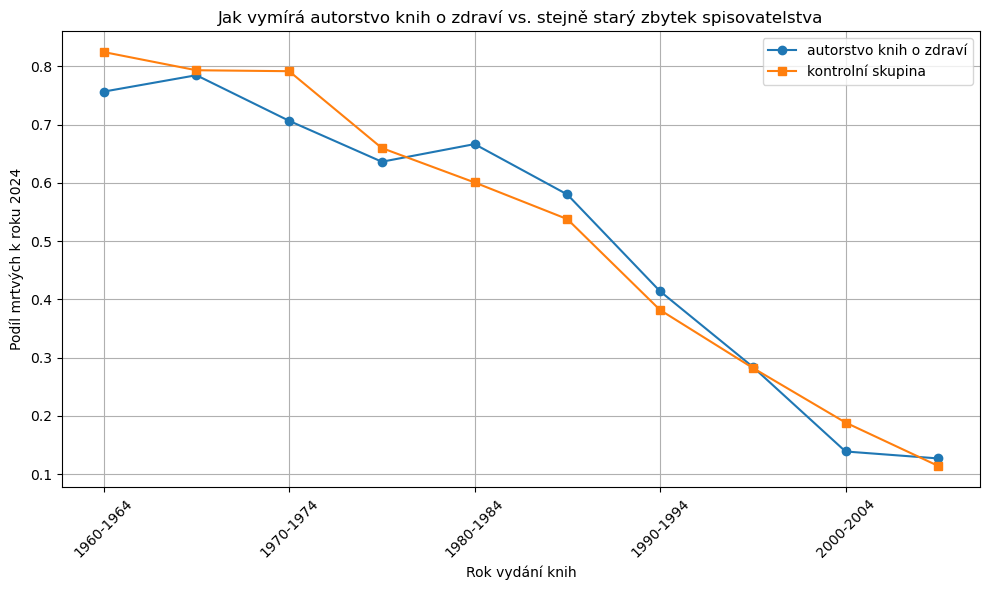

In [678]:
dfz_expl2 = dfz_expl[dfz_expl['rok'].isin(range(1960,2011))]
dfk_expl2 = dfk_expl[dfk_expl['rok'].isin(range(1960,2011))]
z_mrtvi = dfz_expl2.pipe(group_by_five_years_cut)\
    .groupby('period')\
    .apply(lambda x: x['umrti'].notnull().sum() / len(x))
k_mrtvi = dfk_expl2.pipe(group_by_five_years_cut)\
    .groupby('period')\
    .apply(lambda x: x['umrti'].notnull().sum() / len(x))
plt.figure(figsize=(10, 6))
z_mrtvi.plot(label="autorstvo knih o zdraví", marker='o')
k_mrtvi.plot(label="kontrolní skupina", marker='s')

# Customize the plot
plt.title(f"""Jak vymírá autorstvo knih o zdraví vs. stejně starý zbytek spisovatelstva""")
plt.xlabel('Rok vydání knih')
plt.ylabel('Podíl mrtvých k roku 2024')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

In [603]:
dfz_expl['doziti'].mean()

79.42148760330579

In [604]:
dfz_expl['doziti'].median()

81.0

In [605]:
dfk_expl['doziti'].mean()

78.09907407407407

In [606]:
dfk_expl['doziti'].median()

79.0

In [607]:
dfz_expl['vek_zijicich'].median()

67.0

In [608]:
dfk_expl['vek_zijicich'].median()

67.0

In [609]:
dfz_roky_narozeni2 = dfz.groupby("rok").apply(lambda x: [list(row) for row in x[['narozeni','umrti','doziti','vek_zijicich']].values]).reset_index()

C:\Users\micha\AppData\Local\Temp\ipykernel_41680\3202320593.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfz_roky_narozeni2 = dfz.groupby("rok").apply(lambda x: [list(row) for row in x[['narozeni','umrti','doziti','vek_zijicich']].values]).reset_index()


In [610]:
dfz_roky_narozeni2

,rok,0
0,1960.0,"[[1917.0, nan, nan, 107.0], [1921.0, 1997.0, 7..."
1,1961.0,"[[1915.0, 1974.0, 59.0, nan], [1907.0, nan, na..."
2,1962.0,"[[1928.0, nan, nan, 96.0], [1931.0, 2000.0, 69..."
3,1963.0,"[[1913.0, 1978.0, 65.0, nan], [1900.0, 1965.0,..."
4,1964.0,"[[1896.0, 1979.0, 83.0, nan], [1927.0, nan, na..."
5,1965.0,"[[1929.0, 2012.0, 83.0, nan], [1921.0, nan, na..."
6,1966.0,"[[1924.0, nan, nan, 100.0], [1924.0, nan, nan,..."
7,1967.0,"[[1930.0, nan, nan, 94.0], [1913.0, 1995.0, 82..."
8,1968.0,"[[1930.0, 2015.0, 85.0, nan], [1913.0, 1996.0,..."
9,1969.0,"[[1927.0, 2016.0, 89.0, nan], [1921.0, 2002.0,..."
